## Using NLTK 

In this exercise it will be used Natural Language ToolKit to analyse the tokens of the plot of a set of movies defined on a data set containing the name of the movie id, the title, the year, origin and the plot. The focus of this exercise is just on the plot column of the data since is the one that will be more rich

In [1]:
# Import nltk
import nltk

# import json to read the data file
import json

# For data visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# download both punkt and stopwords so that our script understants both punctuation and common stop-words
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guilh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guilh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Used
The base dataset corresponds to the movies.json file, which contain information regarding 7113 movies, containing several information about each movie

In [3]:
# creating the movies variable thatonly retrieves data when called
with open("movies.json", 'r') as f:
    movies = json.load(f)

    

The data is organized in dictionaries, each film on one

In [4]:
print(type(movies[0]))

<class 'dict'>


Each film as the id, title, year, origin and plot stored.
 - the origin field means the country where the filme is produced

In [5]:
# All columns of the dataset
movies[0].keys()

dict_keys(['id', 'title', 'year', 'origin', 'plot'])

In [6]:
# Retrieving some initial information about a movie
movies[0]

{'id': 31818,
 'title': 'The Adventures of Ford Fairlane',
 'year': 1990,
 'origin': 'American',
 'plot': "Ford Fairlane (Andrew Dice Clay) is seen sitting on a beach smoking as the film opens. A flashback initiates, showing a roaring crowd at a concert given by fictional popular heavy metal band The Black Plague. Lead singer Bobby Black (Vince Neil) makes an eccentric entrance down a zip-line onto the stage and begins performing. Shortly into one of the band's songs, Bobby Black collapses on stage and dies.\r\nAfter the lead singer of The Black Plague is murdered onstage, shock-jock Johnny Crunch (Gilbert Gottfried), an old friend who came west with Fairlane, hires Ford to track down a mysterious teenage groupie named Zuzu Petals, who may have a connection to Black's death.\r\nSoon after hiring Fairlane, Crunch is electrocuted on the air. The world's hippest detective soon finds himself trading insults with ruthless record executive Julian Grendel (Wayne Newton), a clueless cop and fo

In [7]:
titles = []
for index, movie in enumerate(movies):
    titles.append((index, movie["title"]))
titles

[(0, 'The Adventures of Ford Fairlane'),
 (1, 'After Dark, My Sweet'),
 (2, 'Air America'),
 (3, 'Alice'),
 (4, 'Almost an Angel'),
 (5, 'The Ambulance'),
 (6, 'American Ninja 4: The Annihilation'),
 (7, "Andre's Mother"),
 (8, 'Angel Town'),
 (9, 'Another 48 Hrs.'),
 (10, 'Arachnophobia'),
 (11, 'Avalon'),
 (12, 'Awakenings'),
 (13, 'Back to the Future Part III'),
 (14, 'Bad Influence'),
 (15, 'Basket Case 2'),
 (16, "Betsy's Wedding"),
 (17, 'Bird on a Wire'),
 (18, 'Blind Faith'),
 (19, 'Bloodfist II'),
 (20, 'Blue Steel'),
 (21, 'The Bonfire of the Vanities'),
 (22, 'Bride of Re-Animator'),
 (23, 'Cadence'),
 (24, 'Cadillac Man'),
 (25, 'Captain America'),
 (26, 'Cartoon All-Stars to the Rescue'),
 (27, 'Catchfire'),
 (28, 'Challenger'),
 (29, 'Checkered Flag'),
 (30, "Child's Play 2"),
 (31, "China O'Brien"),
 (32, 'Class of 1999'),
 (33, 'Come See the Paradise'),
 (34, 'Coupe de Ville'),
 (35, 'Crash and Burn'),
 (36, 'Crazy People'),
 (37, 'Cry-Baby'),
 (38, "Daddy's Dyin': Who'

### Analysing a single movie

The data for *Interview with the Vampire* is on position **878**, and we will use this initial film as the base parameter for this exercise

In [8]:
interview_vampire = movies[878]

Getting some information regarding this film

In [9]:
print(interview_vampire.get("title"))
print(interview_vampire.get("year"))

Interview with the Vampire
1994


The plot information will be essential to analyse the film

In [10]:
plot = interview_vampire.get("plot")

### Text cleaning - normalising & punctuation

In [11]:
import string

plot = plot.lower() # lower case the whole text
plot_nopunctuation = plot.translate(str.maketrans('', '', string.punctuation)) # remove punctuation from the text 

plot_nopunctuation[:200]

'in modernday san francisco reporter daniel molloy interviews louis de pointe du lac who claims to be a vampire louis describes his human life as a wealthy plantation owner in 1791 louisiana despondent'

### Tokenizing the text
By tokenizing the text we are separating each word from the remaining words 

In [12]:
plot_tokenized = nltk.word_tokenize(plot_nopunctuation)
print(plot_tokenized[:200])

['in', 'modernday', 'san', 'francisco', 'reporter', 'daniel', 'molloy', 'interviews', 'louis', 'de', 'pointe', 'du', 'lac', 'who', 'claims', 'to', 'be', 'a', 'vampire', 'louis', 'describes', 'his', 'human', 'life', 'as', 'a', 'wealthy', 'plantation', 'owner', 'in', '1791', 'louisiana', 'despondent', 'following', 'the', 'death', 'of', 'his', 'wife', 'and', 'infant', 'child', 'one', 'night', 'he', 'is', 'attacked', 'by', 'the', 'vampire', 'lestat', 'de', 'lioncourt', 'while', 'drunkenly', 'wandering', 'the', 'waterfront', 'of', 'new', 'orleans', 'lestat', 'senses', 'louis', 'dissatisfaction', 'with', 'life', 'and', 'offers', 'to', 'turn', 'him', 'into', 'a', 'vampire', 'which', 'louis', 'accepts', 'prior', 'to', 'being', 'transformed', 'but', 'while', 'lestat', 'revels', 'in', 'the', 'hunt', 'and', 'killing', 'of', 'humans', 'louis', 'resists', 'killing', 'them', 'drinking', 'animal', 'blood', 'to', 'sustain', 'himself', 'he', 'is', 'disgusted', 'by', 'lestats', 'pleasure', 'in', 'killin

### Curiosity statistics

In [13]:
## Lexical richness
### defining function for lexical richness

def lexical_richness(plot):
    print("Lexical Richness")
    print(str("The percentage of unique words on the movie plot is: ") + 
          str(round(len(set(plot))/len(plot)*100,2))+
          str("%"))
    return 


lexical_richness(plot_tokenized)    
    
    
print(" ")

## Most common "words"
### defining function for most common tokens

def most_common_tokens(plot):
    print("Most common tokens")
    for i in nltk.FreqDist(plot).most_common(15):
        print(str(i[0]) + str(": ") + str(i[1]))

most_common_tokens(plot_tokenized)

Lexical Richness
The percentage of unique words on the movie plot is: 46.75%
 
Most common tokens
and: 30
louis: 29
the: 29
to: 25
a: 20
lestat: 15
in: 13
of: 12
him: 10
claudia: 9
vampire: 8
his: 8
as: 8
he: 7
by: 7


### Comment:

Even whit the tokenization there are a lot of words that are "non-important" words, such as "a", "the", "his", "her"

These words although necessary for gramatically construct a sentence do not transmit any information regarding the film, therefore should be removed

In [14]:
# Remove the stopwords using list comprehension

plot_no_stopwords = [word for word in plot_tokenized if word not in nltk.corpus.stopwords.words("English")]
print(plot_no_stopwords[:20])

['modernday', 'san', 'francisco', 'reporter', 'daniel', 'molloy', 'interviews', 'louis', 'de', 'pointe', 'du', 'lac', 'claims', 'vampire', 'louis', 'describes', 'human', 'life', 'wealthy', 'plantation']


### Comment:
Retrieving again the summary statistics, we can observe that the **lexical richness has increased**, and that the most common tokens have changed.

All of this is, of course, expected, since we are removing the stopwords from the text variable 

In [15]:
lexical_richness(plot_no_stopwords)
print(" ")
most_common_tokens(plot_no_stopwords)

Lexical Richness
The percentage of unique words on the movie plot is: 66.58%
 
Most common tokens
louis: 29
lestat: 15
claudia: 9
vampire: 8
armand: 7
vampires: 6
new: 5
molloy: 4
killing: 4
blood: 4
night: 3
orleans: 3
offers: 3
lestats: 3
girl: 3


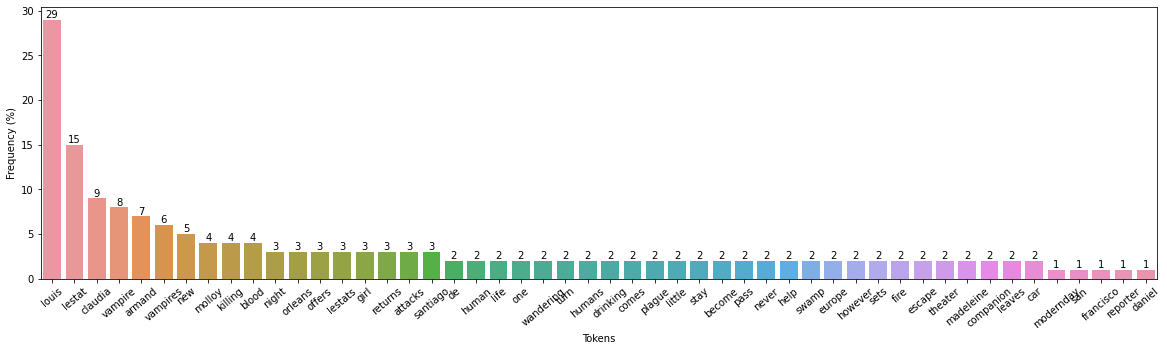

In [16]:
# Simple visualisation of the most common stop words
df_plot = pd.DataFrame(nltk.FreqDist(plot_no_stopwords).most_common(50), columns = ["Tokens", "Frequency (%)"])

plt.figure(figsize = (20,5))
ax = sns.barplot(data = df_plot, y = "Frequency (%)", x = "Tokens")

# Add the values on top of each column
for i in ax.containers:
    ax.bar_label(i,)
    
# Tilt the axis labels    
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)

plt.show()

## Analysing all movies functions definition

Based on this information we can now transform all the data we have for all films to create the above boxplot

In [17]:
# Create function to extract the main tokens without stopwords
def token_distribution(text, language = "English"):
    clean_text = text.lower()
    clean_text = clean_text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(clean_text)
    tokens_without_stopwords = list(filter(lambda word: word not in nltk.corpus.stopwords.words(language), tokens))
    return tokens_without_stopwords


# Create function to plot the token distribution
def plot_token_distribution(tokens_without_stopwords):
    
    df_plot = pd.DataFrame(nltk.FreqDist(tokens_without_stopwords).most_common(50), columns = ["Tokens", "Frequency (%)"])

    plt.figure(figsize = (20,5))
    ax = sns.barplot(data = df_plot, y = "Frequency (%)", x = "Tokens")

    # Add the values on top of each column
    for i in ax.containers:
        ax.bar_label(i,)
    
    # Tilt the axis labels    
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)

    plt.show()

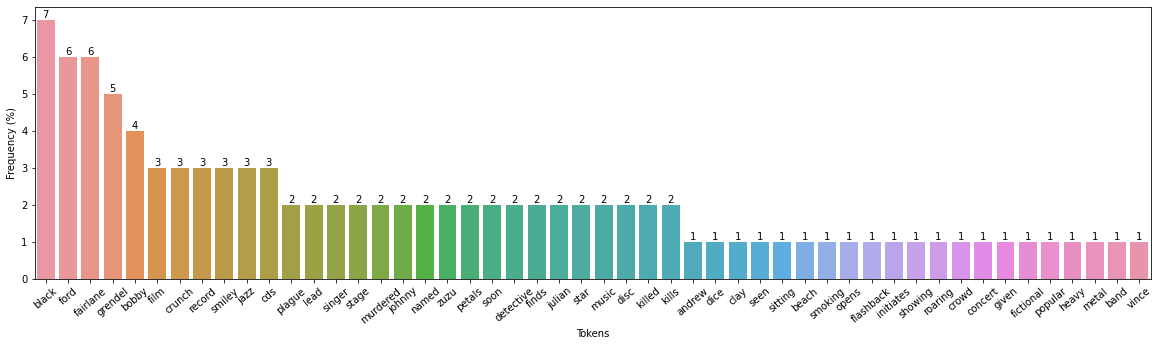

In [18]:
tokens_movie0 = token_distribution(movies[0].get("plot"), "English")

plot_token_distribution(tokens_movie0)